In [6]:
#Sobel filter

import cv2
import numpy as np
img = cv2.imread('lena.png', cv2.IMREAD_GRAYSCALE)
rows, cols = img.shape
# It is used depth of cv2.CV_64F.
sobel_horizontal = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=3)
# Kernel size can be: 1,3,5 or 7.
sobel_vertical = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=3)

sobel_horizontal_abs = np.absolute(sobel_horizontal)
sobel_horizontal_8u = np.uint8(sobel_horizontal_abs)

sobel_vertical_abs = np.absolute(sobel_vertical)
sobel_vertical_8u = np.uint8(sobel_vertical_abs)

cv2.imshow('Original', img)
cv2.imshow('Sobel horizontal', sobel_horizontal_8u)
cv2.imshow('Sobel vertical', sobel_vertical_8u)
cv2.waitKey(0)
cv2.destroyAllWindows()

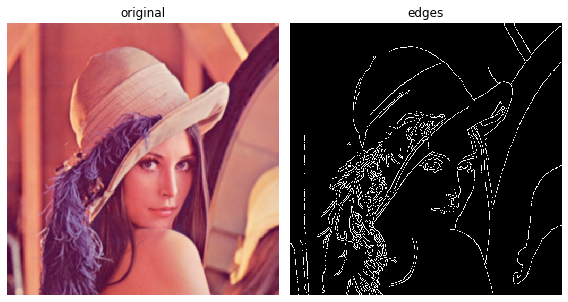

In [5]:
#canny edge detector

import cv2
import matplotlib.pyplot as plt

image = cv2.imread('lena.png')
#sigma to detect fine/coarse feature
image = cv2.GaussianBlur(image,(5,5),0)
edges = cv2.Canny(image, 50, 210)

plt.figure(figsize=(8,5))
plt.subplot(1,2,1)
plt.axis('off')
plt.title('original')
plt.imshow(image[:,:,[2,1,0]])

plt.subplot(1,2,2)
plt.axis('off')
plt.title('edges')
plt.imshow(edges, cmap='gray')

plt.tight_layout()
plt.show()

Detected line: (99 401) (372 353)
Detected circle: center=(200.5 199.5), radius=52.29999923706055


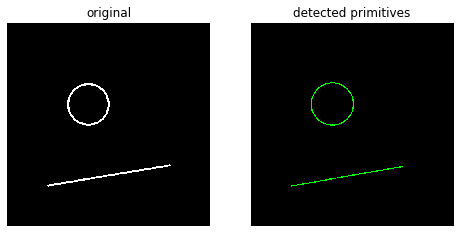

In [6]:
#Hough transform

import cv2
import numpy as np
import matplotlib.pyplot as plt

img = np.zeros((500, 500), np.uint8)
cv2.circle(img, (200, 200), 50, 255, 3)
cv2.line(img, (100, 400), (400, 350), 255, 3)

#be careful: HoughLinesP and HoughCircles return one more dimension, so [0] is necessary
lines = cv2.HoughLinesP(img, 1, np.pi/180, 100, 100, 10)[0]
circles = cv2.HoughCircles(img, cv2.HOUGH_GRADIENT, 1, 15, param1=100,param2=30,minRadius=30,maxRadius=200)[0]

dbg_img = np.zeros((img.shape[0], img.shape[1], 3), np.uint8)
for x1, y1, x2, y2 in lines:
    print('Detected line: ({} {}) ({} {})'.format(x1, y1, x2, y2))
    cv2.line(dbg_img, (x1, y1), (x2, y2), (0, 255, 0), 2)
for c in circles:
    print('Detected circle: center=({} {}), radius={}'.format(c[0], c[1], c[2]))
    cv2.circle(dbg_img, (int(c[0]), int(c[1])), int(c[2]), (0, 255, 0), 2)
                           
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plt.title('original')
plt.axis('off')
plt.imshow(img, cmap='gray')
plt.subplot(1,2,2)
plt.title('detected primitives')
plt.axis('off')
plt.imshow(dbg_img)
plt.show()


###### %%writefile test
## Practice
1. Input images from red_blood_cell.jpg.
2. Use morphological filters to remove noise.
3. Use <i>cv2.HoughCircles()</i> to detect circles.
4. Count automatically how many cells in the image.
5. Optional:Show each individual circle using different color.
6. Use <i>cv2.putText()</i> to write the number of cells on the upper left corner.
7. Show the output image.
8. Upload your Jupyter code file (*.ipynb)
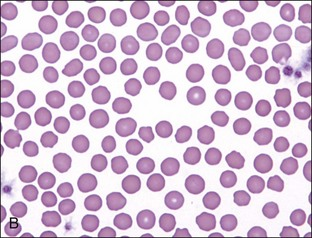